In [1]:
# Lesson Plan, RNA-Seq (Mar 26, 2019)
# R language
# Written by Sabah Ul-Hasan

# Goals
# In 2-4   i. Upload and view the data 
# In 5-13  ii. Merge biological replicates into one dataset 
# In 14    iii. Produce a bar chart of up- and down- regulated ntar genes
# In 15    Modify visualization of the bar chart, and save

# In 16    Time Point 3 (5 min)

In [2]:
# i. Upload and view the data

library(curl) # This function calls the curl package, which allows us the ability to download data from online 

# The read.csv function reads in our data. In this case, two biological replicates for CAY540
# Your file must be in .csv format to load
CAY540_Rep1 = read.csv(curl("https://raw.githubusercontent.com/sabahzero/Nobile-HerndayLabs_BioinformaticsWorkshop_Feb19-2019/master/Data_RNA-Seq_DE-Output/normalized_counts_CAY540_Rep1.csv"))
CAY540_Rep2 = read.csv(curl("https://raw.githubusercontent.com/sabahzero/Nobile-HerndayLabs_BioinformaticsWorkshop_Feb19-2019/master/Data_RNA-Seq_DE-Output/normalized_counts_CAY540_Rep2.csv"))

# Let's say we don't have a GitHub account for our data. 
# Guess what! Since we also uploaded this repository directly in our notebook, we can load it through this route
# Notice the difference in path inside of the ""
CAY540_Rep1_computer = read.csv("~/Desktop/Nobile-HerndayLabs_BioinformaticsWorkshop_Feb19-2019/Data_RNA-Seq_DE-Output/normalized_counts_CAY540_Rep1.csv")

# Lets look at these data
print("CAY540_Rep1")
head(CAY540_Rep1) # The head function shows the first five rows of our datasheet

[1] "CAY540_Rep1"


X,DEA_Sexual_Biofilms_Clinical_Isolates_CAY540_1.FWD_C_albicans__SC5314__,DEA_Sexual_Biofilms_Clinical_Isolates_CAY540P_1.FWD_C_albicans__SC5314__
ERCC-00002,0,0
ERCC-00003,0,0
ERCC-00004,0,0
ERCC-00009,0,0
ERCC-00012,0,0
ERCC-00013,0,0


In [3]:
print("CAY540_Rep2") # This is the view of our second replicate
head(CAY540_Rep2) 

[1] "CAY540_Rep2"


X,DEA_Sexual_Biofilms_Clinical_Isolates_CAY540_2.FWD_C_albicans__SC5314__,DEA_Sexual_Biofilms_Clinical_Isolates_CAY540P_2.FWD_C_albicans__SC5314__
ERCC-00002,0,0
ERCC-00003,0,0
ERCC-00004,0,0
ERCC-00009,0,0
ERCC-00012,0,0
ERCC-00013,0,0


In [4]:
# What do these data mean? Explain the 3 columns and rows

# We have three variables. Variable or column X is the gene name
# These genes are annotated via DEseq

# The 2nd column or variable is our control, the 3rd column or variable is our treatment
# Which genes are down-regulated vs up-regulated from our control? 

In [5]:
# ii. Merge biological replicates into one dataset

# We want the mean and standard deviation 
# Let's relabel our columns for both datasets so we can merge them
library(data.table) # We will need this package to use the re-name function

names(CAY540_Rep1)[1]<-"Gene" # Since the column names are so long, we can re-label by column number 
names(CAY540_Rep2)[1]<-"Gene" # Replicate 2

names(CAY540_Rep1)[2]<-"Control_Rep1" # We want to keep these column names unique so we can show the variation
names(CAY540_Rep2)[2]<-"Control_Rep2"  

names(CAY540_Rep1)[3]<-"Test_Rep1" 
names(CAY540_Rep2)[3]<-"Test_Rep2"  

# Let's check that both datasets have the same column names
print("Updated CAY540_Rep1")
head(CAY540_Rep1)
print("Updated CAY540_Rep2")
head(CAY540_Rep2)

[1] "Updated CAY540_Rep1"


Gene,Control_Rep1,Test_Rep1
ERCC-00002,0,0
ERCC-00003,0,0
ERCC-00004,0,0
ERCC-00009,0,0
ERCC-00012,0,0
ERCC-00013,0,0


[1] "Updated CAY540_Rep2"


Gene,Control_Rep2,Test_Rep2
ERCC-00002,0,0
ERCC-00003,0,0
ERCC-00004,0,0
ERCC-00009,0,0
ERCC-00012,0,0
ERCC-00013,0,0


In [6]:
# Now merge the dataset by Gene name
CAY540 <- merge(CAY540_Rep1, CAY540_Rep2, by="Gene") # Combines datasets into one 
head(CAY540)

# We can write this as a .csv and play with it through the API on http://microscopebioinformatics.org
write.csv(CAY540, file = "CAY540.csv")

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2
ERCC-00002,0,0,0,0
ERCC-00003,0,0,0,0
ERCC-00004,0,0,0,0
ERCC-00009,0,0,0,0
ERCC-00012,0,0,0,0
ERCC-00013,0,0,0,0


In [7]:
# Let's clean up the data a little by removing genes where all 4 columns = 0 and make that a new dataset
CAY540_Positive = CAY540[!(CAY540$Control_Rep1==0 & CAY540$Test_Rep1==0 & CAY540$Control_Rep1==0 & CAY540$Test_Rep2==0),]
head(CAY540_Positive) # Notice this creates a new column numbering the resulting genes (left)

,Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2
18,ERCC-00035,1.052852,0.000000,0.000000,0.000000
94,its2,245.314449,203.257493,280.117289,381.697255
96,NOVEL-Ca21chr1-002,214.781750,93.080534,72.151423,90.476386
98,NOVEL-Ca21chr1-004,9.475665,14.247021,4.244201,6.597236
99,NOVEL-Ca21chr1-005,7.369962,10.447815,11.671554,5.654774
100,NOVEL-Ca21chr1-007,5.264259,4.749007,4.244201,3.769849


In [8]:
# Let's create two columns that show the subtracted result for test-control as new columns
CAY540_Positive$Rep1 = CAY540_Positive$Test_Rep1 - CAY540_Positive$Control_Rep1 # Treatment - control  for rep 1
CAY540_Positive$Rep2 = CAY540_Positive$Test_Rep2 - CAY540_Positive$Control_Rep2

head(CAY540_Positive) # ta-da! 

,Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2
18,ERCC-00035,1.052852,0.000000,0.000000,0.000000,-1.0528517,0.0000000
94,its2,245.314449,203.257493,280.117289,381.697255,-42.0569563,101.5799659
96,NOVEL-Ca21chr1-002,214.781750,93.080534,72.151423,90.476386,-121.7012155,18.3249634
98,NOVEL-Ca21chr1-004,9.475665,14.247021,4.244201,6.597236,4.7713551,2.3530352
99,NOVEL-Ca21chr1-005,7.369962,10.447815,11.671554,5.654774,3.0778531,-6.0167795
100,NOVEL-Ca21chr1-007,5.264259,4.749007,4.244201,3.769849,-0.5152517,-0.4743519


In [9]:
# Let's calculate the mean and standard deviation for these replicates
CAY540_Positive$Rep_mean = rowMeans(CAY540_Positive[c('Rep1', 'Rep2')]) # calculate mean
CAY540_Positive$Rep_SDev = apply(CAY540_Positive[,7:8], 1, sd) # calculate for 1 standard devation (+/-)

head(CAY540_Positive)

,Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev
18,ERCC-00035,1.052852,0.000000,0.000000,0.000000,-1.0528517,0.0000000,-0.5264259,0.37223929
94,its2,245.314449,203.257493,280.117289,381.697255,-42.0569563,101.5799659,29.7615048,50.78332087
96,NOVEL-Ca21chr1-002,214.781750,93.080534,72.151423,90.476386,-121.7012155,18.3249634,-51.6881260,49.50673033
98,NOVEL-Ca21chr1-004,9.475665,14.247021,4.244201,6.597236,4.7713551,2.3530352,3.5621951,0.85500522
99,NOVEL-Ca21chr1-005,7.369962,10.447815,11.671554,5.654774,3.0778531,-6.0167795,-1.4694632,3.21543820
100,NOVEL-Ca21chr1-007,5.264259,4.749007,4.244201,3.769849,-0.5152517,-0.4743519,-0.4948018,0.01446027


In [10]:
# Let's organize this datasheet a little futher, and re-number the number of genes accordingly

library("tidyverse") # We will need this package to use the filter function

CAY540_Positive = CAY540_Positive %>% arrange(Rep_SDev) # orders your data by standard deviation, updates dataset
CAY540_Positive = CAY540_Positive %>% filter(Rep_SDev < 1) # removes genes with an SDev higher than 1 (not informative), updates dataset

CAY540_Positive$GeneNumber <- 1:nrow(CAY540_Positive) # Creates column for Gene number
print("genes with a result that isn't 0:")
max(CAY540_Positive$GeneNumber) # 1000 genes with a positive result and SDev > 1
print("number of unique genes:")
length(unique(CAY540_Positive$Gene)) # validate check that each is a unique gene

head(CAY540_Positive)

# We can write this as a new .csv if we want (check folder to see it worked)
write.csv(CAY540_Positive, file = "CAY540_Positive.csv") # Note that you can see this folder on your personal computer or through your browser

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()    masks data.table::between()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks data.table::first()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::last()       masks data.table::last()
✖ readr::parse_date() masks curl::parse_date()
✖ purrr::transpose()  masks data.table::transpose()


[1] "genes with a result that isn't 0:"


[1] 1000

[1] "number of unique genes:"


[1] 1000

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
orf19.7402,121.077947,110.1769589,89.128228,78.2243756,-10.9009882,-10.9038526,-10.9024204,0.001012706,1
ntar_939,6.317110,7.5984110,13.793654,15.0793977,1.2813007,1.2857433,1.2835220,0.001570723,2
orf19.5711,7.369962,8.5482123,6.366302,7.5396989,1.1782503,1.1733968,1.1758236,0.001715966,3
orf19.6525,34.744107,40.8414589,29.709409,35.8135696,6.0973523,6.1041602,6.1007562,0.002406937,4
NOVEL-Ca21chr2-014,0.000000,0.9498014,0.000000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,5
NOVEL-Ca21chr6-030,0.000000,0.9498014,0.000000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,6


In [11]:
# We're interested in ntar genes, so let's subset for that

library(dplyr) # We will need this package for grabbing anything with the 'ntar' in the gene title

ntar_only = filter(CAY540_Positive, grepl("ntar",Gene)) # This will subset for everything ntar

print("number of ntar genes:")
length(unique(ntar_only$Gene)) # 161 of our original 1000


head(ntar_only) # notice the gene numbers are kept the same as before
# we can change this if we want, but let's keep it so we can backtrack if needed

write.csv(ntar_only, file = "CAY540_ntar.csv") # We should now have 3 .csv files in our folder

# Recap
print("Recap")
print("Master merged dataset of CAY540 replicates")
head(CAY540) # Simply merges two replicates by gene name
print("Genes with positive numbers for CAY540 master dataset")
head(CAY540_Positive) # Genes with a SDev < 1 between control and treatment
# Positive may not be the term you want to use. In which case, you can edit to be whatever you want. 
print("Genes with positive numbers for CAY540 master dataset, ntar genes only")
head(ntar_only) # ntar genes with a SDev < 1 between control and treatment

[1] "number of ntar genes:"


[1] 161

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
ntar_939,6.317110,7.5984110,13.79365,15.0793977,1.2813007,1.2857433,1.2835220,0.001570723,2
ntar_1373,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,7
ntar_1396,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,8
ntar_827,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,9
ntar_941,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,10
ntar_1421,1.052852,0.0000000,1.06105,0.0000000,-1.0528517,-1.0610503,-1.0569510,0.002898650,14


[1] "Recap"
[1] "Master merged dataset of CAY540 replicates"


Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2
ERCC-00002,0,0,0,0
ERCC-00003,0,0,0,0
ERCC-00004,0,0,0,0
ERCC-00009,0,0,0,0
ERCC-00012,0,0,0,0
ERCC-00013,0,0,0,0


[1] "Genes with positive numbers for CAY540 master dataset"


Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
orf19.7402,121.077947,110.1769589,89.128228,78.2243756,-10.9009882,-10.9038526,-10.9024204,0.001012706,1
ntar_939,6.317110,7.5984110,13.793654,15.0793977,1.2813007,1.2857433,1.2835220,0.001570723,2
orf19.5711,7.369962,8.5482123,6.366302,7.5396989,1.1782503,1.1733968,1.1758236,0.001715966,3
orf19.6525,34.744107,40.8414589,29.709409,35.8135696,6.0973523,6.1041602,6.1007562,0.002406937,4
NOVEL-Ca21chr2-014,0.000000,0.9498014,0.000000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,5
NOVEL-Ca21chr6-030,0.000000,0.9498014,0.000000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,6


[1] "Genes with positive numbers for CAY540 master dataset, ntar genes only"


Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
ntar_939,6.317110,7.5984110,13.79365,15.0793977,1.2813007,1.2857433,1.2835220,0.001570723,2
ntar_1373,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,7
ntar_1396,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,8
ntar_827,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,9
ntar_941,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,10
ntar_1421,1.052852,0.0000000,1.06105,0.0000000,-1.0528517,-1.0610503,-1.0569510,0.002898650,14


In [12]:
# For simplicity, let's focus on the ntar genes with a value of greater than 10 (for up- or down- regulation) 

High_ntar = ntar_only %>% filter(Rep_mean > 9.99 | Rep_mean < -9.99)

print("number of ntar genes up- or down- regulated by 10:")
length(unique(High_ntar$Gene)) # 9 of 161 ntar, out of our original 1000 with SDev < 1

head(High_ntar)

[1] "number of ntar genes up- or down- regulated by 10:"


[1] 9

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
ntar_274,3.158555,19.94583,8.488403,25.44648,16.78727,16.95808,16.87268,0.06038951,111
ntar_52,0.000000,22.79523,20.159956,43.35327,22.79523,23.19331,22.99427,0.14074224,171
ntar_970,17.898479,63.63669,36.075711,82.93669,45.73821,46.86098,46.29959,0.39695680,521
ntar_227,90.545247,37.99205,103.982933,52.77789,-52.55319,-51.20504,-51.87912,0.47664362,588
ntar_63,66.329658,50.33947,64.724070,47.12312,-15.99019,-17.60095,-16.79557,0.56949221,629
ntar_1157,96.862358,69.33550,112.471336,86.70654,-27.52686,-25.76480,-26.64583,0.62298193,664


In [13]:
# Recap: How much time would we estimate this would've taken us to make in Excel?

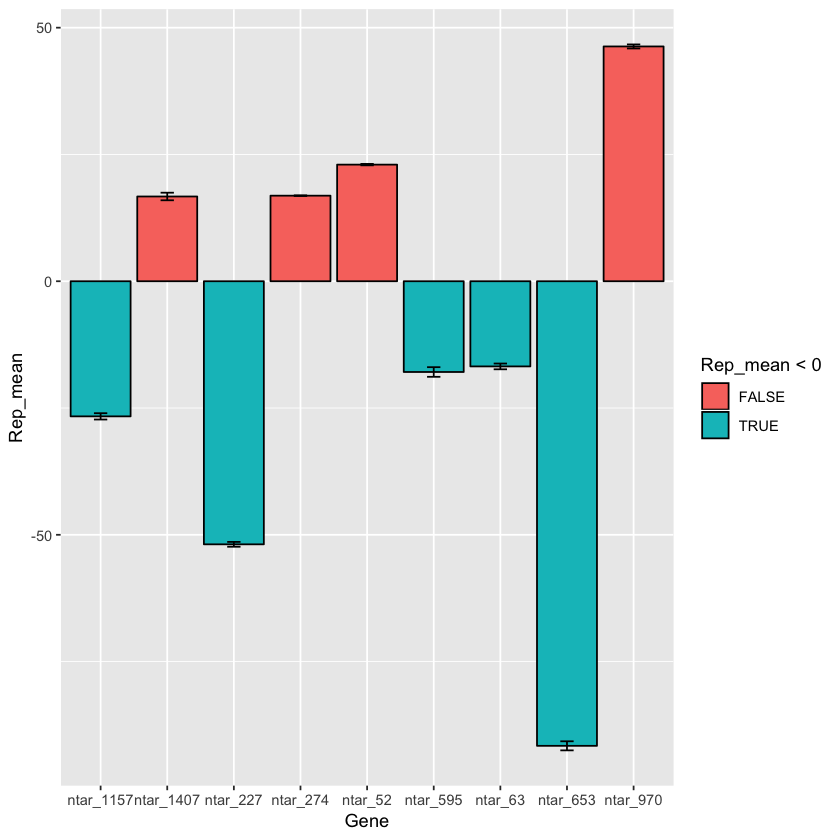

In [14]:
# iii. Produce a bar chart of up- and down- regulated ntar genes

# Let's make a bar chart of the ntars that shows their mean values and standard deviation 
library(ggplot2) # We'll need this package to create the graph

# Creates plot
ntars = ggplot(High_ntar, aes(x=Gene, y=Rep_mean, fill = Rep_mean < 0)) + # data set, x and y axes, assign color to up- or down-
geom_bar(stat="identity", color="black", position=position_dodge()) + # bar chart style
  geom_errorbar(aes(ymin=Rep_mean-Rep_SDev, ymax=Rep_mean+Rep_SDev), width=.2, # add error bar
                 position=position_dodge(.9)) 

ntars # plot

Saving 7 x 7 in image


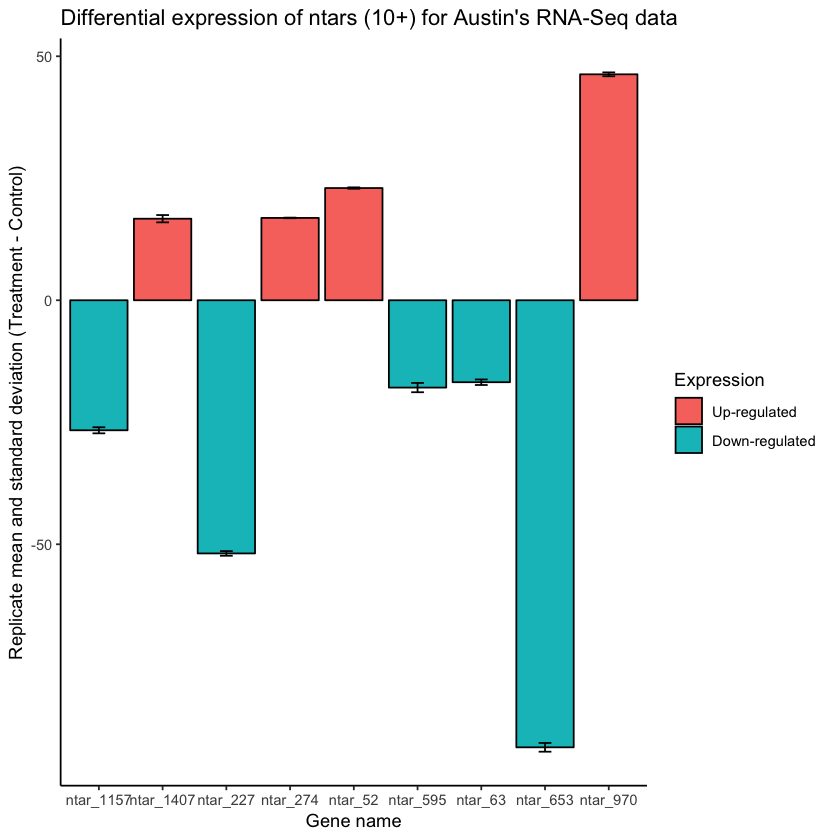

In [15]:
# iv. Modify visualization of the bar chart, and save

# How can we improve the quality of this graph?
ntar_barchart = ntars + 
scale_fill_discrete(name  ="Expression", # Label legend
                            breaks=c("FALSE", "TRUE"),
                            labels=c("Up-regulated", "Down-regulated")) + # Rename values in legend
labs(title="Differential expression of ntars (10+) for Austin's RNA-Seq data", # Label graph
     x="Gene name", y = "Replicate mean and standard deviation (Treatment - Control)") + # Label axes
theme_classic() # Change style

ntar_barchart # View chart
ggsave("High_ntar_barchart.png", dpi = 800) # Save as a figure in your folder with dpi of 800 

In [16]:
# That may have taken some time to go through step-by-step, but now you have this automated set-up which takes a matter of minutes produce
# Much faster than Excel!

# Time Point 3 (5 min): How might we interpret these results, and what could we still adjust? 
# https://github.com/sabahzero/Lesson-Plan_RNA-Seq